You are provided 3 datasets below:

- https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

- https://www.kaggle.com/datasets/mastmustu/income (Note: you need to convert the 
problem into a binary classification to find whether the income is above 45K or not.)

- Gene expression csv in the zipped file.

For each of the datasets provided apply proper scaling and 
feature engineering.

- You need to train and test 3 different classification models 
(logistic regression, KNN, SVM) on each dataset separately so in 
total you will train and test 9 different models.

- For the KNN, try 20 different K values, select the best k using the 
elbow method with plotting.


- For the SVM:

- Compare linear kernel versus 2 non-linear kernels. Select the 
best.

- Compute accuracy, precision, recall and F1-score for each of the 9 
models.

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

# Dataset Transformation

## Heart Disease Dataset Transformation

In [ ]:
heart_disease = pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
heart_disease.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
heart_disease.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
heart_disease.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
features = heart_disease.drop('HeartDiseaseorAttack', axis = 1)
labels = heart_disease['HeartDiseaseorAttack']
heart_disease_train_features, heart_disease_test_features, heart_disease_train_labels, heart_disease_test_labels = train_test_split(
    features, labels, test_size=0.3, random_state=101)

In [ ]:
heart_disease_train_features.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,...,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000
mean,0.429427,0.423441,0.962855,28.385165,0.442616,0.040642,0.295676,0.756898,0.633503,0.811309,...,0.951159,0.084415,2.509799,3.182249,4.235561,0.168215,0.440037,8.033529,5.051184,6.053183
std,0.494996,0.494105,0.189117,6.617613,0.496698,0.197459,0.696794,0.428957,0.481849,0.391264,...,0.215536,0.278009,1.067290,7.425181,8.709490,0.374058,0.496393,3.055898,0.985543,2.071801
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
heart_disease_train_features['BMI'] = MinMaxScaler().fit_transform(heart_disease_train_features[['BMI']])
heart_disease_test_features['BMI'] = MinMaxScaler().fit_transform(heart_disease_test_features[['BMI']])

heart_disease_train_features['GenHlth'] = MinMaxScaler().fit_transform(heart_disease_train_features[['GenHlth']])
heart_disease_test_features['GenHlth'] = MinMaxScaler().fit_transform(heart_disease_test_features[['GenHlth']])

heart_disease_train_features['MentHlth'] = MinMaxScaler().fit_transform(heart_disease_train_features[['MentHlth']])
heart_disease_test_features['MentHlth'] = MinMaxScaler().fit_transform(heart_disease_test_features[['MentHlth']])

heart_disease_train_features['PhysHlth'] = MinMaxScaler().fit_transform(heart_disease_train_features[['PhysHlth']])
heart_disease_test_features['PhysHlth'] = MinMaxScaler().fit_transform(heart_disease_test_features[['PhysHlth']])

heart_disease_train_features['Age'] = MinMaxScaler().fit_transform(heart_disease_train_features[['Age']])
heart_disease_test_features['Age'] = MinMaxScaler().fit_transform(heart_disease_test_features[['Age']])

heart_disease_train_features['Education'] = MinMaxScaler().fit_transform(heart_disease_train_features[['Education']])
heart_disease_test_features['Education'] = MinMaxScaler().fit_transform(heart_disease_test_features[['Education']])

heart_disease_train_features['Income'] = MinMaxScaler().fit_transform(heart_disease_train_features[['Income']])
heart_disease_test_features['Income'] = MinMaxScaler().fit_transform(heart_disease_test_features[['Income']])

In [ ]:
heart_disease_train_features.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,...,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000
mean,0.429427,0.423441,0.962855,0.190525,0.442616,0.040642,0.295676,0.756898,0.633503,0.811309,...,0.951159,0.084415,0.377450,0.106075,0.141185,0.168215,0.440037,0.586127,0.810237,0.721883
std,0.494996,0.494105,0.189117,0.076949,0.496698,0.197459,0.696794,0.428957,0.481849,0.391264,...,0.215536,0.278009,0.266822,0.247506,0.290316,0.374058,0.496393,0.254658,0.197109,0.295972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Income Dataset Transformation

In [ ]:
income = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


### Imputation

In [ ]:
income.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [ ]:
income['workclass'].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [ ]:
income['workclass'] = income['workclass'].fillna(income.groupby('education')['workclass']
                                                             .transform(lambda x: x.mode()[0]))

In [ ]:
income['occupation'].value_counts()

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [ ]:
income['occupation'] = income['occupation'].fillna(income.groupby('workclass')['occupation']
                                                               .transform(lambda x: x.mode()))

In [ ]:
income['native-country'] = income['native-country'].fillna(income.groupby('race')['native-country']
                                                             .transform(lambda x: x.mode()[0]))

### Outliers

In [ ]:
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
income['capital-gain'].value_counts()

0        40330
15024      448
7688       370
7298       328
99999      228
         ...  
6612         1
1639         1
7262         1
1111         1
1731         1
Name: capital-gain, Length: 122, dtype: int64

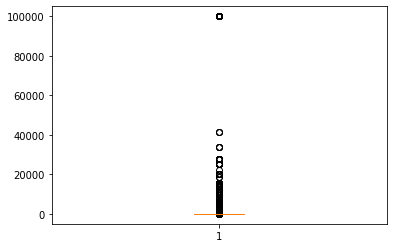

In [ ]:
plt.boxplot(income['capital-gain'])
plt.show()

In [ ]:
intervals = [0, 1, 1100, 100000]
labels = ['no capital gain', 'average', 'high']
income['capital-gain'] = pd.cut(x=income['capital-gain'],
                             bins=intervals,
                             labels=labels,
                             include_lowest=True)

In [ ]:
income['capital-loss'].value_counts()

0       41884
1902      276
1977      225
1887      201
2415       65
        ...  
2467        1
1539        1
1421        1
2201        1
155         1
Name: capital-loss, Length: 97, dtype: int64

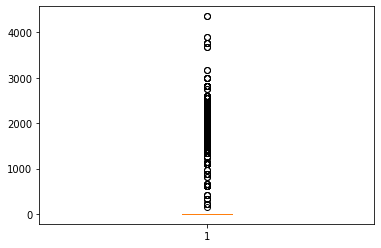

In [ ]:
plt.boxplot(income['capital-loss'])
plt.show()

In [ ]:
intervals = [0, 1, 100, 5000]
labels = ['no capital loss', 'average', 'high']
income['capital-loss'] = pd.cut(x=income['capital-loss'],
                             bins=intervals,
                             labels=labels,
                             include_lowest=True)

### Encoding

In [ ]:
income['marital-status'].value_counts()

Married-civ-spouse       20147
Never-married            14513
Divorced                  5971
Widowed                   1364
Separated                 1361
Married-spouse-absent      570
Married-AF-spouse           31
Name: marital-status, dtype: int64

In [ ]:
income['married'] = np.where(income['marital-status'].isin(['Never-married', 'Divorced', 'Widowed', 'Separated']), 0, 1)

In [ ]:
income['gender'] = np.where(income['gender'] == 'Female', 0, 1)

In [ ]:
categorical_cols = ['occupation', 'workclass', 'relationship', 'race', 'native-country']

In [ ]:
def calculate_top_categories(df, column):
    return [
        x for x in df[column].value_counts().sort_values(
            ascending=False).head(5).index
    ]

def one_hot_encode(df, column, top_x_labels):
    for label in top_x_labels:
        df[column + '_' + label] = np.where(
            df[column] == label, 1, 0) 

In [ ]:
for column in categorical_cols:
  top_x = calculate_top_categories(income, column)
  one_hot_encode(income, column, top_x)

In [ ]:
income.drop(['occupation', 'workclass', 'relationship', 'race', 'native-country','marital-status', 'education'], axis = 1, inplace = True)

In [ ]:
intervals = [0, 20, 40, 60, 90]
labels = ['youth', 'young adult', 'adult', 'senior']
income['age'] = pd.cut(x=income['age'],
                             bins=intervals,
                             labels=labels,
                             include_lowest=True)

In [ ]:
label_encoding = {'age': {'youth': 1, 'young adult': 2, 'adult': 3, 'senior': 4}, 
                      'capital-gain': {'no capital gain': 0, 'average': 1, 'high': 2},
                      'capital-loss': {'no capital loss': 0, 'average': 1, 'high': 2}}
income = income.replace(label_encoding)

### Scaling

In [ ]:
income.describe()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income_>50K,married,occupation_Craft-repair,...,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Eskimo,race_Other,native-country_United-States,native-country_Mexico,native-country_Philippines,native-country_Germany,native-country_Puerto-Rico
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,...,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,2.411539,1.896730e+05,10.074118,0.668835,0.162431,0.094319,40.407694,0.239279,0.472007,0.125555,...,0.854744,0.095957,0.031235,0.009578,0.008486,0.914348,0.020020,0.006211,0.004277,0.003799
std,0.735420,1.058215e+05,2.575092,0.470637,0.543960,0.423966,12.400303,0.426648,0.499221,0.331350,...,0.352362,0.294536,0.173954,0.097396,0.091727,0.279853,0.140069,0.078563,0.065259,0.061521
min,1.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.174960e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.781000e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.376710e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.490400e+06,16.000000,1.000000,2.000000,2.000000,99.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
income.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income_>50K', 'married',
       'occupation_Craft-repair', 'occupation_Prof-specialty',
       'occupation_Exec-managerial', 'occupation_Adm-clerical',
       'occupation_Sales', 'workclass_Private', 'workclass_Self-emp-not-inc',
       'workclass_Local-gov', 'workclass_State-gov', 'workclass_Self-emp-inc',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_White', 'race_Black', 'race_Asian-Pac-Islander',
       'race_Amer-Indian-Eskimo', 'race_Other', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Puerto-Rico'],
      dtype='object')

In [ ]:
income.drop('race_Other', axis = 1, inplace = True)

In [ ]:
income_train_features, income_test_features, income_train_labels, income_test_labels = train_test_split(
                income.drop('income_>50K', axis = 1), income['income_>50K'], test_size=0.3, random_state=101)

In [ ]:
income_train_features['hours-per-week'] = MinMaxScaler().fit_transform(income_train_features[['hours-per-week']])
income_test_features['hours-per-week'] = MinMaxScaler().fit_transform(income_test_features[['hours-per-week']])

income_train_features['fnlwgt'] = StandardScaler().fit_transform(income_train_features[['fnlwgt']])
income_test_features['fnlwgt'] = StandardScaler().fit_transform(income_test_features[['fnlwgt']])

In [ ]:
income_train_features.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,married,occupation_Craft-repair,occupation_Prof-specialty,...,relationship_Wife,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Eskimo,native-country_United-States,native-country_Mexico,native-country_Philippines,native-country_Germany,native-country_Puerto-Rico
28733,3,-0.439895,9,1,0,0,0.397959,1,0,0,...,0,1,0,0,0,1,0,0,0,0
12134,2,0.345126,9,1,0,0,0.602041,1,1,0,...,0,1,0,0,0,1,0,0,0,0
7351,2,-0.436662,9,1,0,0,0.295918,0,0,0,...,0,1,0,0,0,1,0,0,0,0
15866,2,-1.332493,13,0,0,0,0.346939,0,0,0,...,0,1,0,0,0,1,0,0,0,0
15782,3,-1.219647,9,1,0,2,0.418367,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
income_train_features.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'married', 'occupation_Craft-repair',
       'occupation_Prof-specialty', 'occupation_Exec-managerial',
       'occupation_Adm-clerical', 'occupation_Sales', 'workclass_Private',
       'workclass_Self-emp-not-inc', 'workclass_Local-gov',
       'workclass_State-gov', 'workclass_Self-emp-inc', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_White',
       'race_Black', 'race_Asian-Pac-Islander', 'race_Amer-Indian-Eskimo',
       'native-country_United-States', 'native-country_Mexico',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Puerto-Rico'],
      dtype='object')

## Gene Expression Dataset Transformation

In [ ]:
gene_expression = pd.read_csv('/content/drive/MyDrive/gene_expression.csv')

In [ ]:
gene_expression.head()

In [ ]:
gene_expression.isnull().sum()

In [ ]:
gene_expression_train_features, gene_expression_test_features, gene_expression_train_labels, gene_expression_test_labels = train_test_split(
      gene_expression.drop('Cancer Present', axis = 1), gene_expression['Cancer Present'], test_size=0.3, random_state=101)

# Dataset 1 Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(heart_disease_train_features, heart_disease_train_labels)

LogisticRegression()

In [ ]:
heart_disease_predictions = log_model.predict(heart_disease_test_features)

In [ ]:
pd.DataFrame(heart_disease_predictions).value_counts()

0.0    74402
1.0     1702
dtype: int64

In [ ]:
accuracy_score(heart_disease_test_labels, heart_disease_predictions)

0.9069956901082729

In [ ]:
confusion_matrix(heart_disease_test_labels, heart_disease_predictions)

array([[68116,   792],
       [ 6286,   910]])

In [ ]:
print(classification_report(heart_disease_test_labels, heart_disease_predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     68908
         1.0       0.53      0.13      0.20      7196

    accuracy                           0.91     76104
   macro avg       0.73      0.56      0.58     76104
weighted avg       0.88      0.91      0.88     76104



In [ ]:
# for Logistic Regression : 
# The accuracy score is 0.9069956901082729
# for the KNN : 
# the accuracy score of the best KNN model is 0.9033690738988752
# for the SVM the accuracy score was a follows for the each kernel:
# Linear Kernel : 0.9054451802796174
# Radial basis kernel : 0.9071008094186902
# Sigmoid kernel : 0.8333333333333334
#----------------------------------
# The best accuracy score is obtained by the SVM using the radial basis kernel 
# The svm has outperformed logistic regression has there are imbalanced classes 
# The svm and Knn performance difference is insignficant but it is likely to outperform knn when 
# there are clearly seperate classes

## KNNs

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
test_error_rates = []

for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(heart_disease_train_features, heart_disease_train_labels) 
   
    y_pred_test = knn_model.predict(heart_disease_test_features)
    
    test_error = 1 - accuracy_score(heart_disease_test_labels, y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

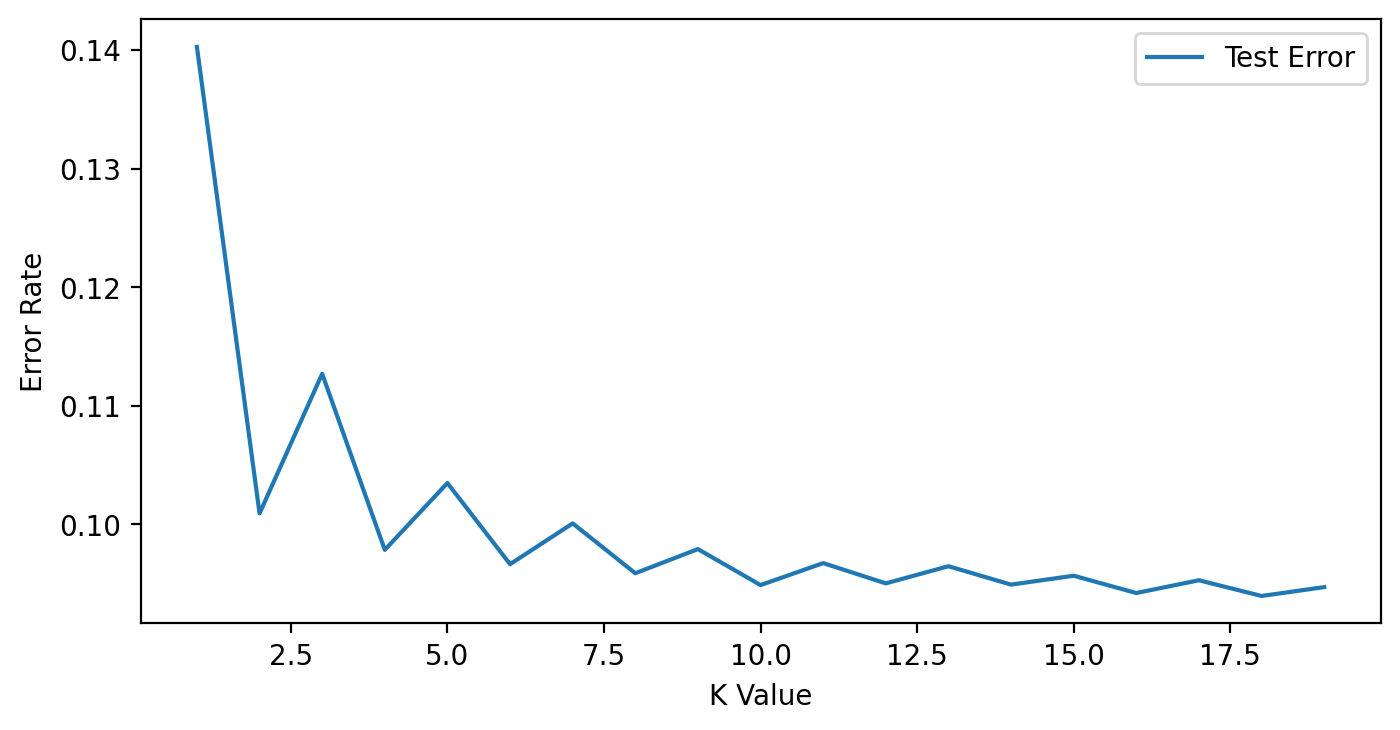

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(range(1, 20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

6 is a suitable number for K

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn_model.fit(heart_disease_train_features, heart_disease_train_labels)
y_pred_test = knn_model.predict(heart_disease_test_features)

In [ ]:
accuracy_score(heart_disease_test_labels, y_pred_test)

0.9033690738988752

In [ ]:
confusion_matrix(heart_disease_test_labels, y_pred_test)

array([[68080,   828],
       [ 6526,   670]])

In [ ]:
print(classification_report(heart_disease_test_labels, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     68908
         1.0       0.45      0.09      0.15      7196

    accuracy                           0.90     76104
   macro avg       0.68      0.54      0.55     76104
weighted avg       0.87      0.90      0.87     76104



## SVM

In [ ]:
from sklearn.svm import SVC

### Linear Kernel

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(heart_disease_train_features, heart_disease_train_labels)

SVC(kernel='linear')

In [ ]:
heart_disease_predictions = svm_linear.predict(heart_disease_test_features)

In [ ]:
accuracy_score(heart_disease_test_labels, heart_disease_predictions)

0.9054451802796174

In [ ]:
confusion_matrix(heart_disease_test_labels, heart_disease_predictions)

array([[68908,     0],
       [ 7196,     0]])

In [ ]:
print(classification_report(heart_disease_test_labels, heart_disease_predictions))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68908
         1.0       0.00      0.00      0.00      7196

    accuracy                           0.91     76104
   macro avg       0.45      0.50      0.48     76104
weighted avg       0.82      0.91      0.86     76104



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Radial Basis Function Kernel

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(heart_disease_train_features, heart_disease_train_labels)

SVC()

In [ ]:
heart_disease_predictions = svm_rbf.predict(heart_disease_test_features)

In [ ]:
accuracy_score(heart_disease_test_labels, heart_disease_predictions)

0.9071008094186902

In [ ]:
confusion_matrix(heart_disease_test_labels, heart_disease_predictions)

array([[68666,   242],
       [ 6828,   368]])

In [ ]:
print(classification_report(heart_disease_test_labels, heart_disease_predictions))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68908
         1.0       0.60      0.05      0.09      7196

    accuracy                           0.91     76104
   macro avg       0.76      0.52      0.52     76104
weighted avg       0.88      0.91      0.87     76104



### Sigmoid Kernel

In [ ]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(heart_disease_train_features, heart_disease_train_labels)

SVC(kernel='sigmoid')

In [ ]:
heart_disease_predictions = svm_sigmoid.predict(heart_disease_test_features)

In [ ]:
accuracy_score(heart_disease_test_labels, heart_disease_predictions)

0.8333333333333334

In [ ]:
confusion_matrix(heart_disease_test_labels, heart_disease_predictions)

array([[62645,  6263],
       [ 6421,   775]])

In [ ]:
print(classification_report(heart_disease_test_labels, heart_disease_predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     68908
         1.0       0.11      0.11      0.11      7196

    accuracy                           0.83     76104
   macro avg       0.51      0.51      0.51     76104
weighted avg       0.83      0.83      0.83     76104



# Dataset 2 Models

## Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=400)

In [ ]:
log_model.fit(income_train_features, income_train_labels)

LogisticRegression(max_iter=400)

In [ ]:
income_predictions = log_model.predict(income_test_features)

In [ ]:
accuracy_score(income_test_labels, income_predictions)

0.8356839551107067

In [ ]:
confusion_matrix(income_test_labels, income_predictions)

array([[9248,  750],
       [1417, 1773]])

In [ ]:
print(classification_report(income_test_labels, income_predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9998
           1       0.70      0.56      0.62      3190

    accuracy                           0.84     13188
   macro avg       0.78      0.74      0.76     13188
weighted avg       0.83      0.84      0.83     13188



## KNNs

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
test_error_rates = []

for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(income_train_features, income_train_labels) 
   
    income_predictions = knn_model.predict(income_test_features)
    
    test_error = 1 - accuracy_score(income_test_labels, income_predictions)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

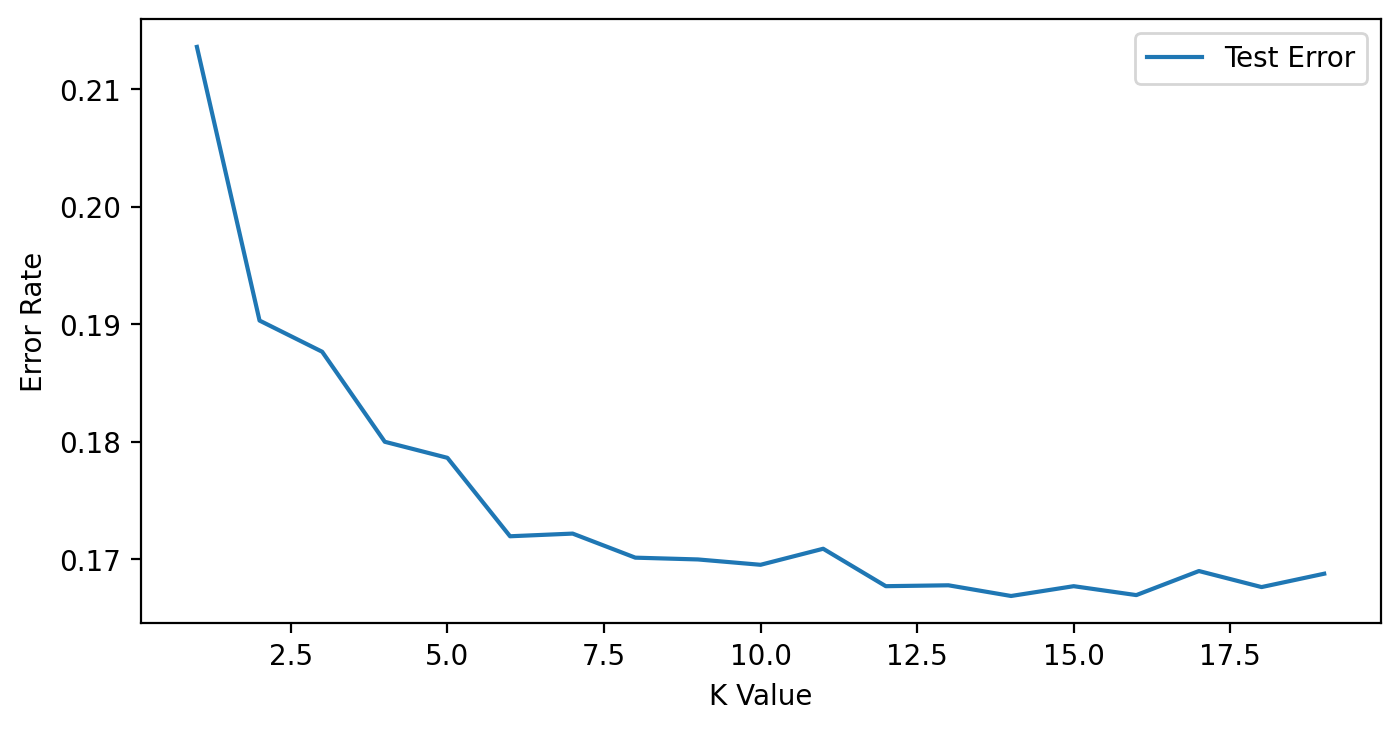

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(range(1, 20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

6 is a suitable number for K

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn_model.fit(income_train_features, income_train_labels)
income_predictions = knn_model.predict(income_test_features)

In [ ]:
accuracy_score(income_test_labels, income_predictions)

0.8280254777070064

In [ ]:
confusion_matrix(income_test_labels, income_predictions)

array([[9331,  667],
       [1601, 1589]])

In [ ]:
print(classification_report(income_test_labels, income_predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9998
           1       0.70      0.50      0.58      3190

    accuracy                           0.83     13188
   macro avg       0.78      0.72      0.74     13188
weighted avg       0.82      0.83      0.82     13188



## SVM

### Linear Kernel

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(income_train_features, income_train_labels)

SVC(kernel='linear')

In [ ]:
income_predictions = svm_linear.predict(income_test_features)

In [ ]:
accuracy_score(income_test_labels, income_predictions)

0.8359872611464968

In [ ]:
confusion_matrix(income_test_labels, income_predictions)

array([[9266,  732],
       [1431, 1759]])

In [ ]:
print(classification_report(income_test_labels, income_predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9998
           1       0.71      0.55      0.62      3190

    accuracy                           0.84     13188
   macro avg       0.79      0.74      0.76     13188
weighted avg       0.83      0.84      0.83     13188



### Radial Basis Function Kernel

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(income_train_features, income_train_labels)

SVC()

In [ ]:
income_predictions = svm_rbf.predict(income_test_features)

In [ ]:
accuracy_score(income_test_labels, income_predictions)

0.8353806490749166

In [ ]:
confusion_matrix(income_test_labels, income_predictions)

array([[9345,  653],
       [1518, 1672]])

In [ ]:
print(classification_report(income_test_labels, income_predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      9998
           1       0.72      0.52      0.61      3190

    accuracy                           0.84     13188
   macro avg       0.79      0.73      0.75     13188
weighted avg       0.83      0.84      0.83     13188



### Sigmoid Kernel

In [ ]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(income_train_features, income_train_labels)

SVC(kernel='sigmoid')

In [ ]:
income_predictions = svm_sigmoid.predict(income_test_features)

In [ ]:
accuracy_score(income_test_labels, income_predictions)

0.6071428571428571

In [ ]:
confusion_matrix(income_test_labels, income_predictions)

array([[7495, 2503],
       [2678,  512]])

In [ ]:
print(classification_report(income_test_labels, income_predictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      9998
           1       0.17      0.16      0.17      3190

    accuracy                           0.61     13188
   macro avg       0.45      0.46      0.45     13188
weighted avg       0.60      0.61      0.60     13188



# for Logistic Regression : 
# The accuracy score is 0.8356839551107067
# for the KNN : 
# the accuracy score of the best KNN model is 0.8280254777070064
# for the SVM the accuracy score was a follows for the each kernel:
# Linear Kernel :0.8359872611464968
# Radial basis kernel : 0.8353806490749166
# Sigmoid kernel : 0.6071428571428571
#---------------------------------
# The best accuracy score is obtained by the SVM using the linear kernel

# Dataset 3 Models

## Logistic Regression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(gene_expression_train_features, gene_expression_train_labels)

LogisticRegression()

In [ ]:
gene_expression_predictions = log_model.predict(gene_expression_test_features)

In [ ]:
accuracy_score(gene_expression_test_labels, gene_expression_predictions)

0.86

In [ ]:
confusion_matrix(gene_expression_test_labels, gene_expression_predictions)

array([[366,  57],
       [ 69, 408]])

In [ ]:
print(classification_report(gene_expression_test_labels, gene_expression_predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       423
           1       0.88      0.86      0.87       477

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



## KNNs

In [ ]:
test_error_rates = []

for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(gene_expression_train_features, gene_expression_train_labels) 
   
    gene_expression_predictions = knn_model.predict(gene_expression_test_features)
    
    test_error = 1 - accuracy_score(gene_expression_test_labels, gene_expression_predictions)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

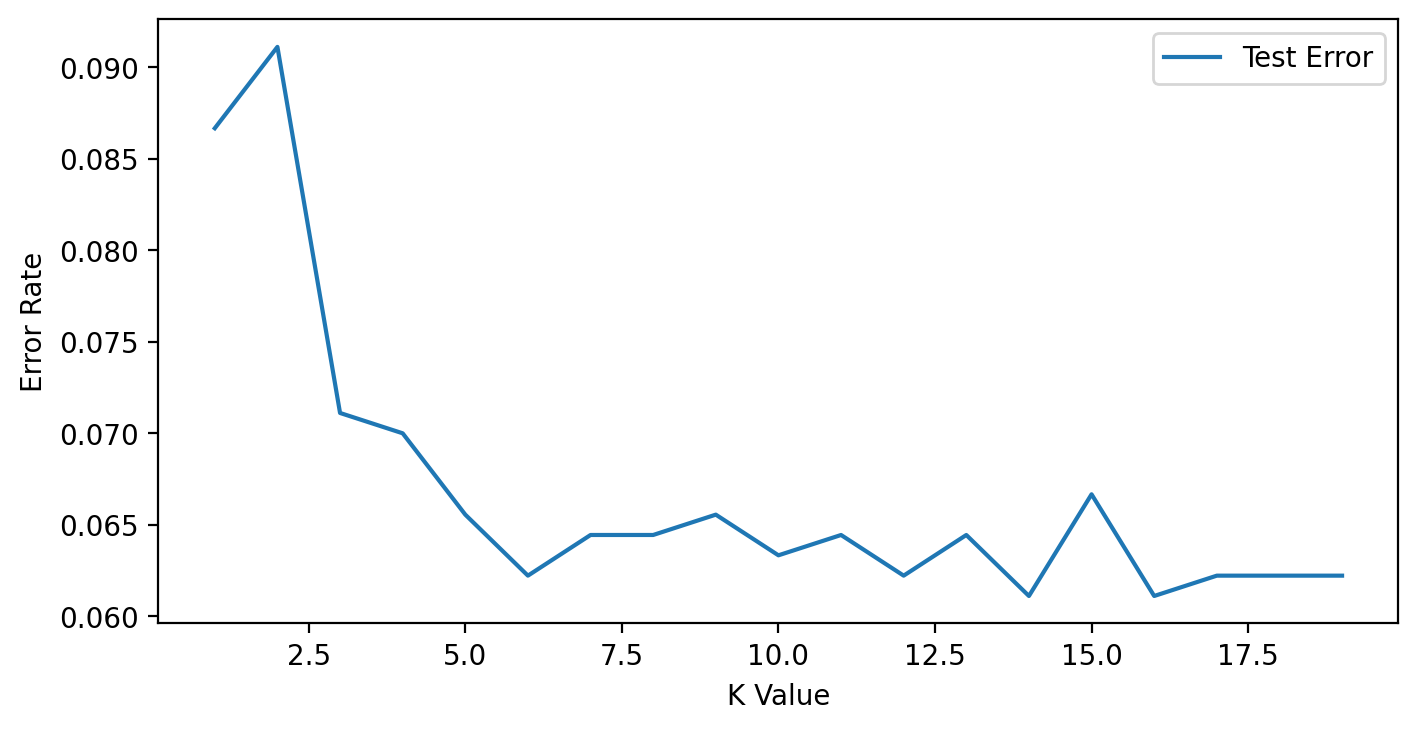

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(range(1, 20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

6 is a suitable number for K

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn_model.fit(gene_expression_train_features, gene_expression_train_labels)
gene_expression_predictions = knn_model.predict(gene_expression_test_features)

In [ ]:
accuracy_score(gene_expression_test_labels, gene_expression_predictions)

0.9377777777777778

In [ ]:
confusion_matrix(gene_expression_test_labels, gene_expression_predictions)

array([[398,  25],
       [ 31, 446]])

In [ ]:
print(classification_report(gene_expression_test_labels, gene_expression_predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       423
           1       0.95      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



## SVM

### Linear Kernel

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(gene_expression_train_features, gene_expression_train_labels)

SVC(kernel='linear')

In [ ]:
gene_expression_predictions = svm_linear.predict(gene_expression_test_features)

In [ ]:
accuracy_score(gene_expression_test_labels, gene_expression_predictions)

0.8622222222222222

In [ ]:
confusion_matrix(gene_expression_test_labels, gene_expression_predictions)

array([[365,  58],
       [ 66, 411]])

In [ ]:
print(classification_report(gene_expression_test_labels, gene_expression_predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       423
           1       0.88      0.86      0.87       477

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900



### Radial Basis Function Kernel

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(gene_expression_train_features, gene_expression_train_labels)

SVC()

In [ ]:
gene_expression_predictions = svm_rbf.predict(gene_expression_test_features)

In [ ]:
accuracy_score(gene_expression_test_labels, gene_expression_predictions)

0.9333333333333333

In [ ]:
confusion_matrix(gene_expression_test_labels, gene_expression_predictions)

array([[391,  32],
       [ 28, 449]])

In [ ]:
print(classification_report(gene_expression_test_labels, gene_expression_predictions))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       423
           1       0.93      0.94      0.94       477

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



### Sigmoid Kernel

In [ ]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(gene_expression_train_features, gene_expression_train_labels)

SVC(kernel='sigmoid')

In [ ]:
gene_expression_predictions = svm_sigmoid.predict(gene_expression_test_features)

In [ ]:
accuracy_score(gene_expression_test_labels, gene_expression_predictions)

0.47

In [ ]:
confusion_matrix(gene_expression_test_labels, gene_expression_predictions)

array([[423,   0],
       [477,   0]])

In [ ]:
print(classification_report(gene_expression_test_labels, gene_expression_predictions))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       423
           1       0.00      0.00      0.00       477

    accuracy                           0.47       900
   macro avg       0.23      0.50      0.32       900
weighted avg       0.22      0.47      0.30       900



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# for Logistic Regression : 
# The accuracy score is 0.86
# for the KNN : 
# the accuracy score of the best KNN model is 0.9377777777777778
# for the SVM the accuracy score was a follows for the each kernel:
# Linear Kernel :0.8622222222222222
# Radial basis kernel : 0.9333333333333333
# Sigmoid kernel : 0.47
#---------------------------------
# The best accuracy score is obtained by the SVM using the Radial Basis Kernel 